# Heart Failure Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Renaming the columns
df.rename(columns={'cp':'ChestPainType'}, inplace=True)
df.rename(columns={'trtbps':'RestingBP'}, inplace=True)
df.rename(columns={'chol':'Cholesterol'}, inplace=True)
df.rename(columns={'fbs':'FastingBS'}, inplace=True)
df.rename(columns={'restecg':'RestingECG'}, inplace=True)
df.rename(columns={'exng':'ExerciseAngina'}, inplace=True)
df.rename(columns={'slp':'ST_Slope'}, inplace=True)
df.rename(columns={'output':'HeartDisease'}, inplace=True)
df.rename(columns={'thalachh':'MaxHeartRate'}, inplace=True)


In [10]:
df.columns

Index(['age', 'sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHeartRate', 'ExerciseAngina', 'oldpeak', 'ST_Slope',
       'caa', 'thall', 'HeartDisease'],
      dtype='object')

In [11]:
df.head(5)

,age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,oldpeak,ST_Slope,caa,thall,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Now I am performing some EDA on dataset

#### Data Visualisation

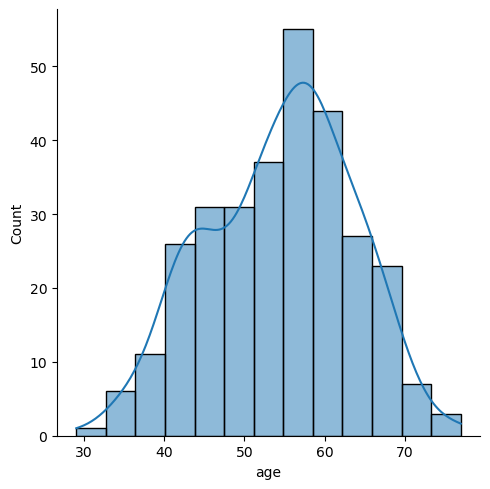

In [12]:
sns.displot(df['age'] , kde = True)

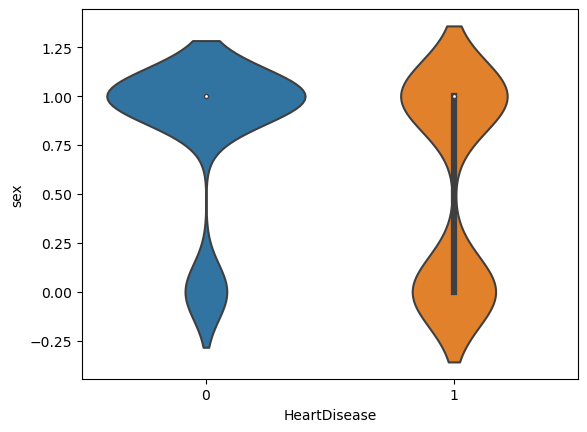

In [13]:
sns.violinplot(x = df['HeartDisease'] , y = df['sex'])
plt.show()

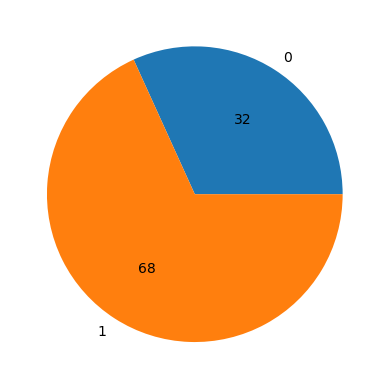

In [14]:
df.groupby('sex').size().plot(kind = 'pie' , autopct = '%.0f')
plt.show()

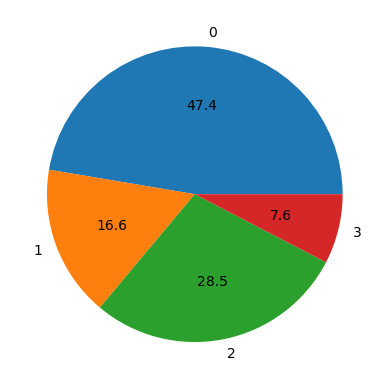

In [15]:
df.groupby('ChestPainType').size().plot(kind = 'pie',autopct = '%.1f')
plt.show()

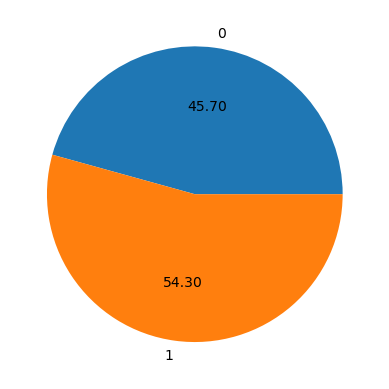

In [16]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.2f')
plt.show()

In [17]:
df.corr()

,age,sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,oldpeak,ST_Slope,caa,thall,HeartDisease
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
ChestPainType,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
RestingBP,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
FastingBS,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
RestingECG,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
MaxHeartRate,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
ExerciseAngina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


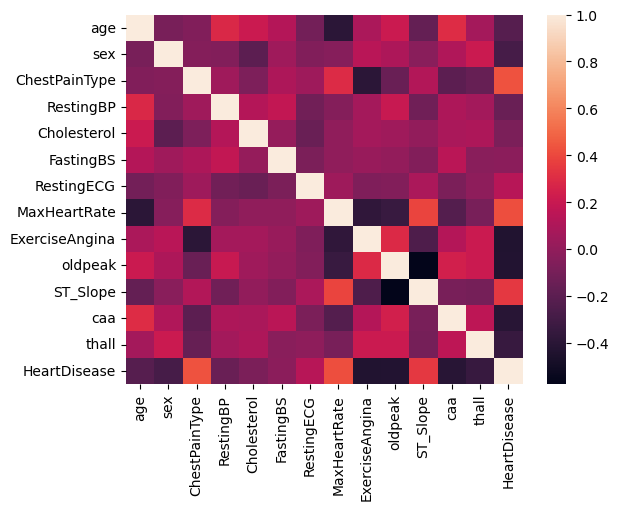

In [18]:
sns.heatmap(df.corr())
plt.show()

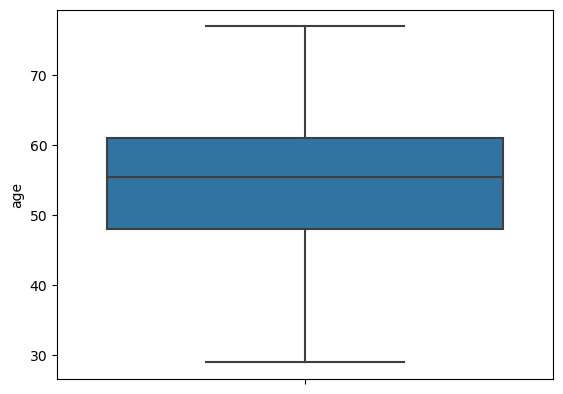

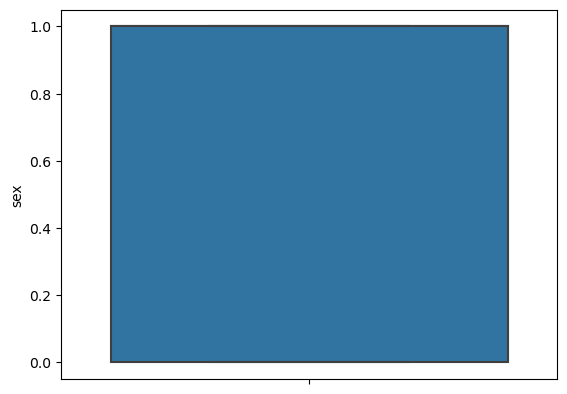

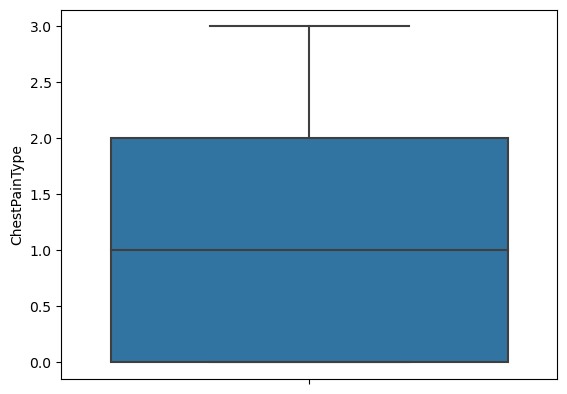

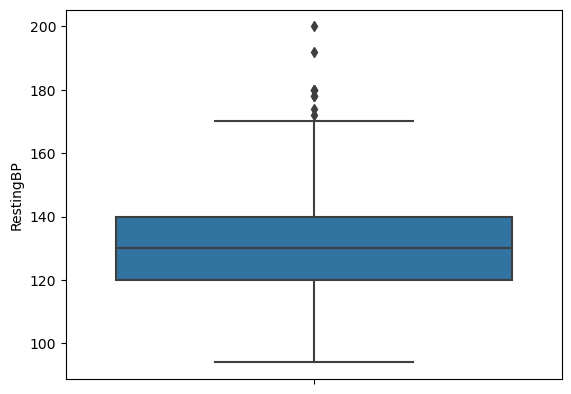

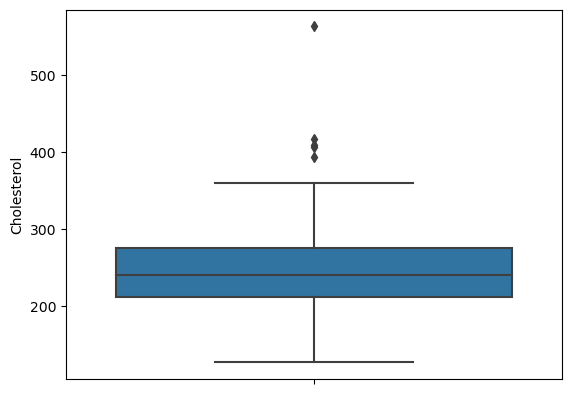

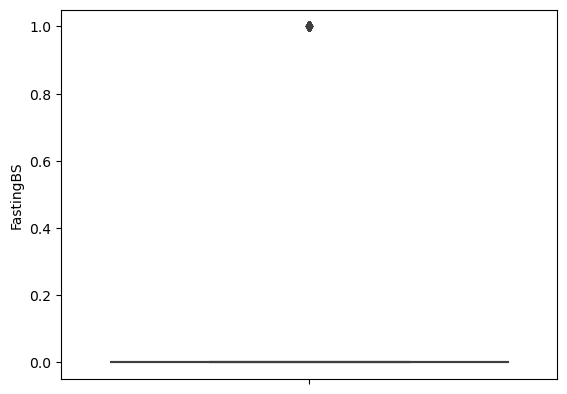

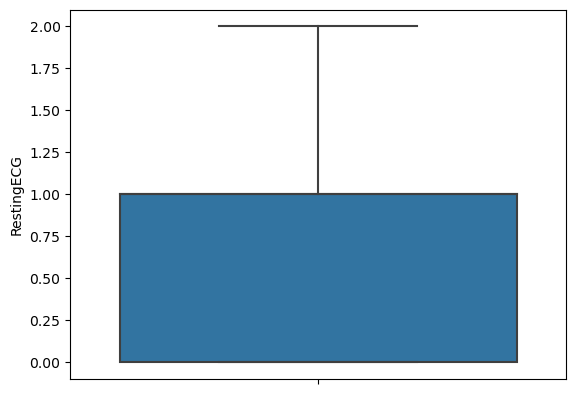

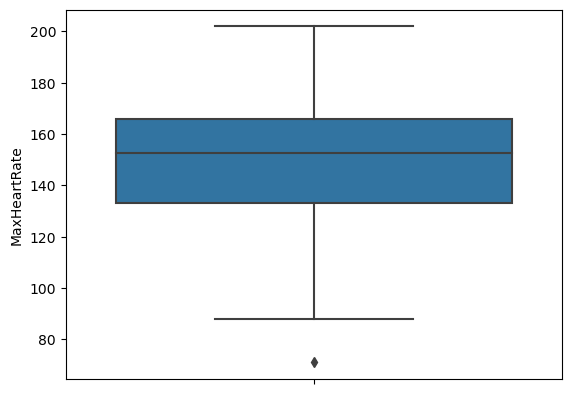

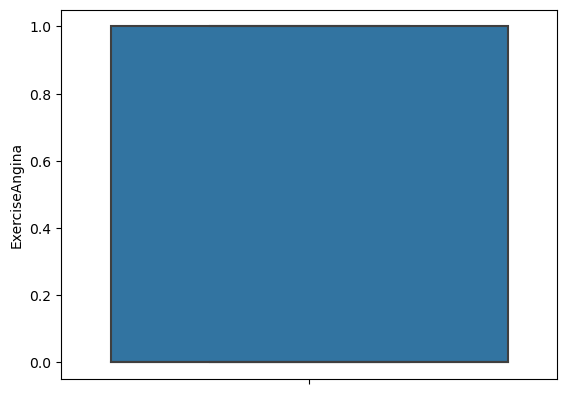

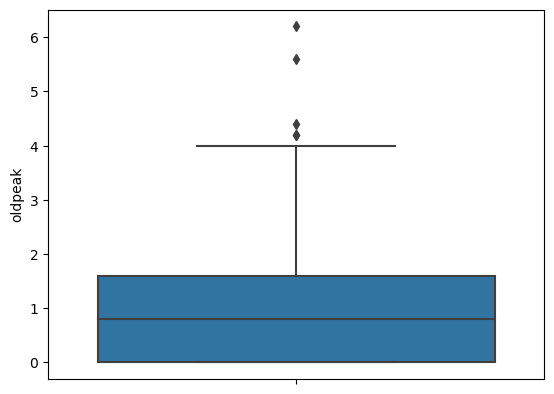

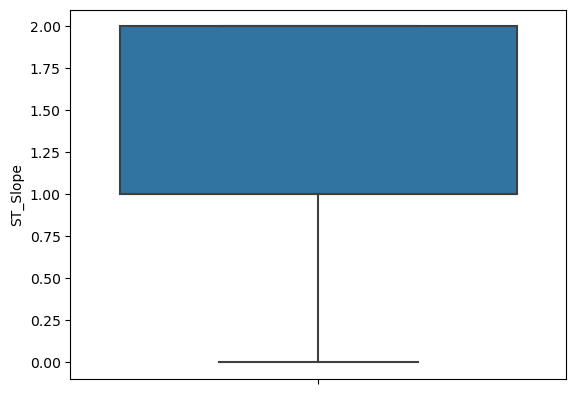

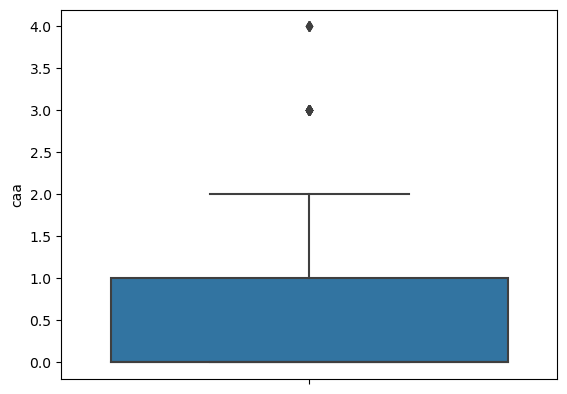

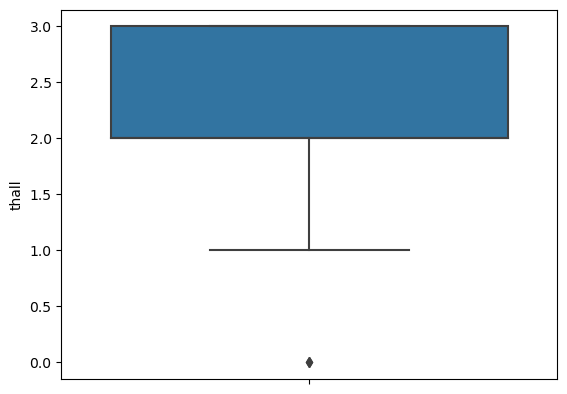

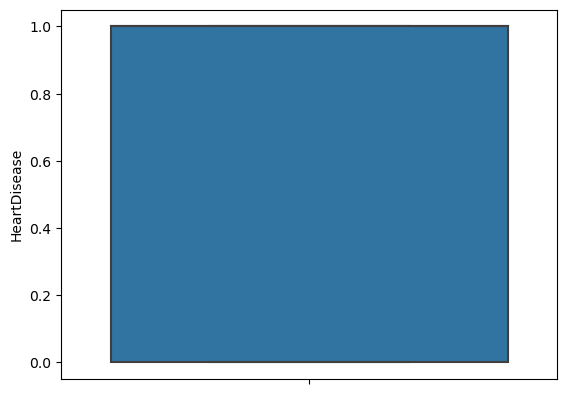

In [19]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

In [20]:
df.columns

Index(['age', 'sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHeartRate', 'ExerciseAngina', 'oldpeak', 'ST_Slope',
       'caa', 'thall', 'HeartDisease'],
      dtype='object')

#### treating outliers

In [21]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [22]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

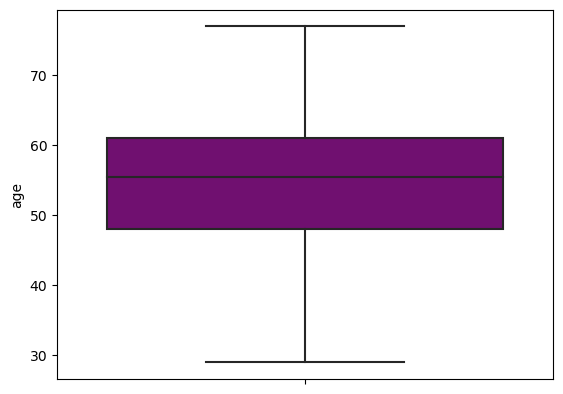

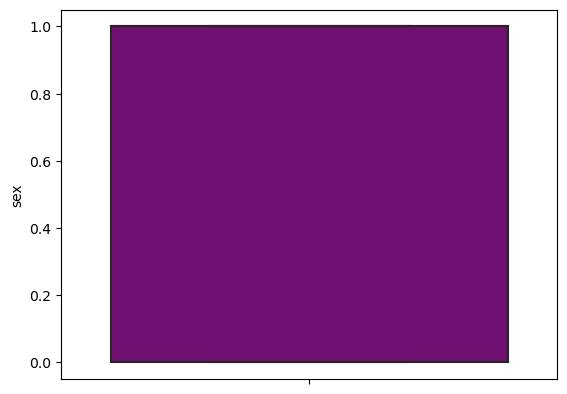

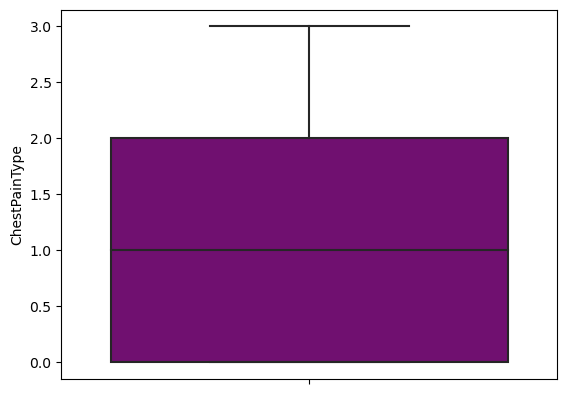

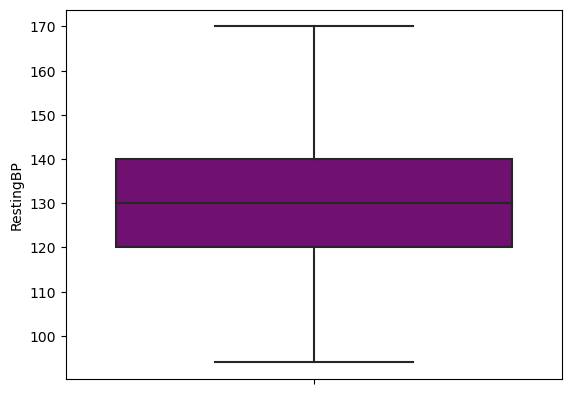

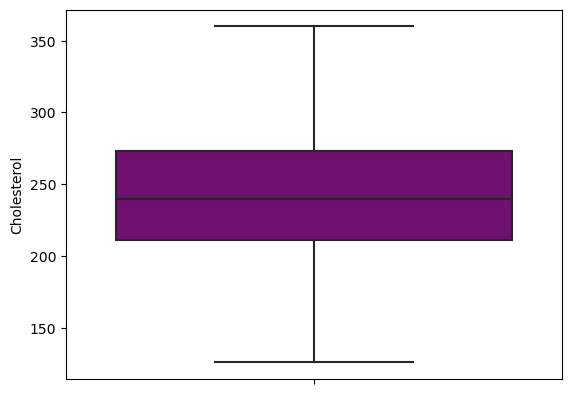

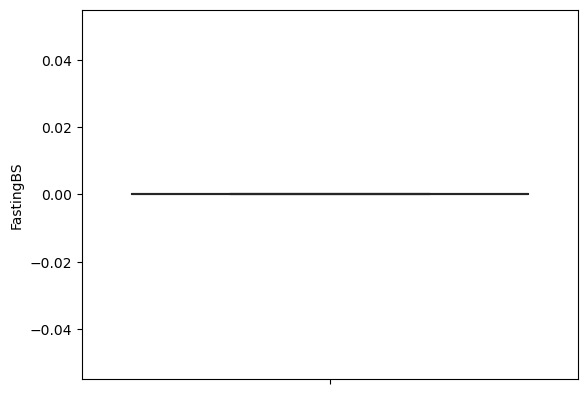

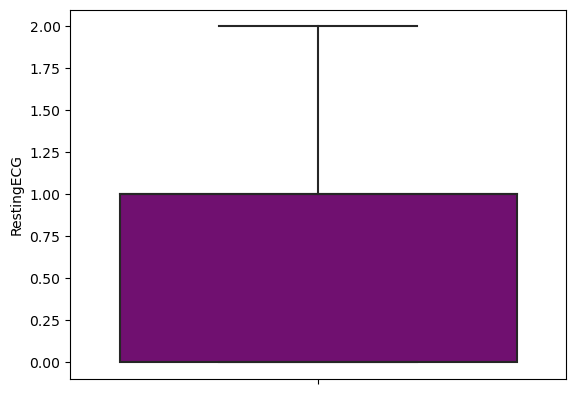

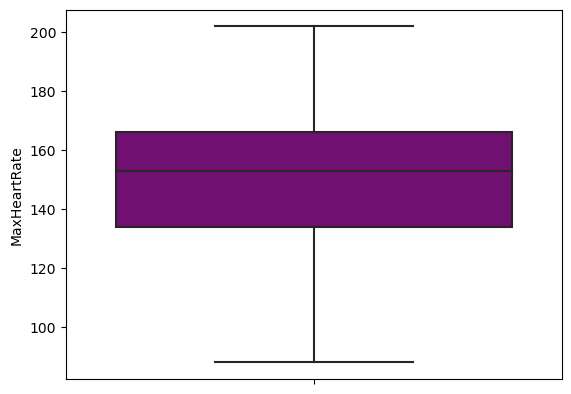

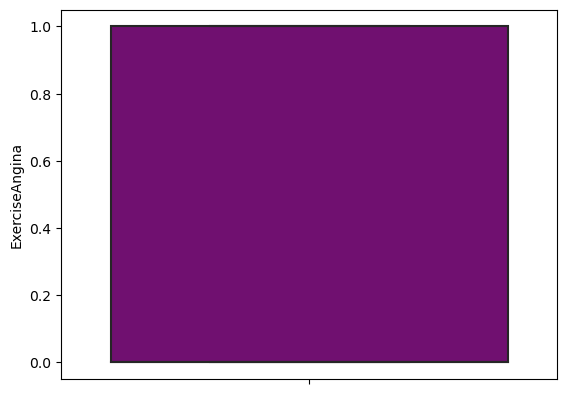

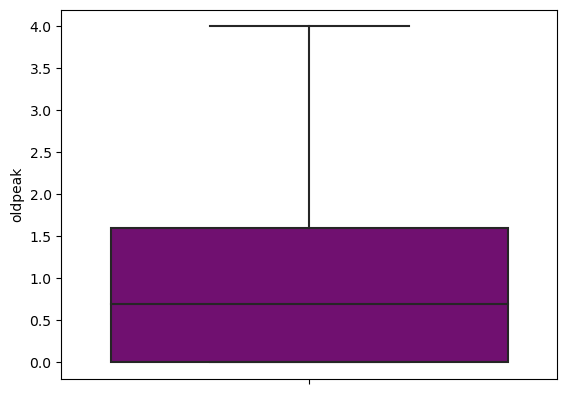

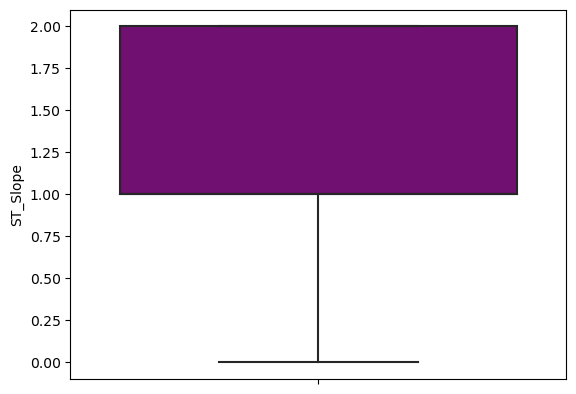

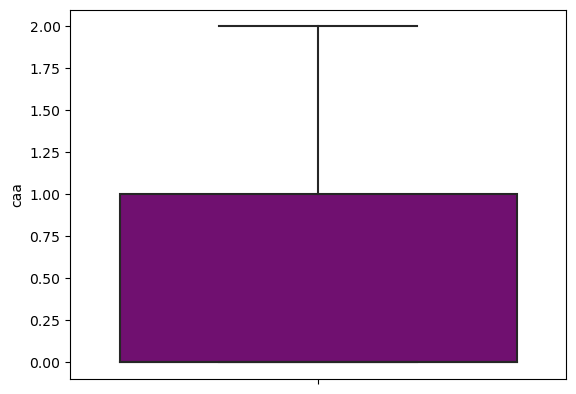

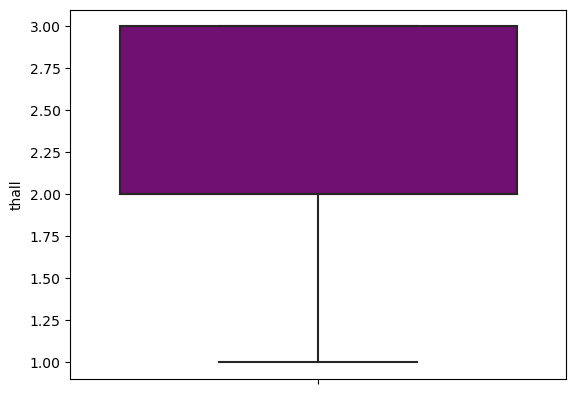

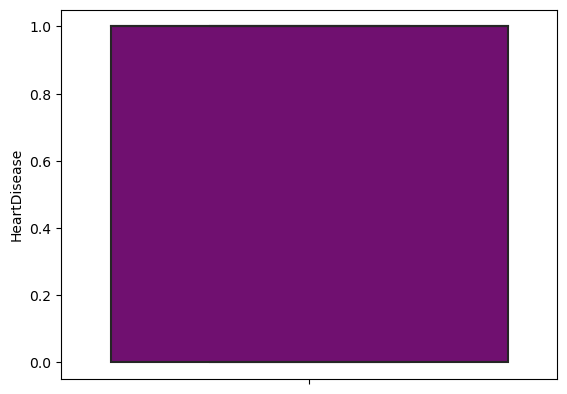

In [23]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='purple')
        plt.show()

In [24]:
df.isnull().sum()

age                0
sex                0
ChestPainType      0
RestingBP          9
Cholesterol        5
FastingBS         45
RestingECG         0
MaxHeartRate       1
ExerciseAngina     0
oldpeak            5
ST_Slope           0
caa               24
thall              2
HeartDisease       0
dtype: int64

In [25]:
a=['RestingBP','Cholesterol','FastingBS','MaxHeartRate','oldpeak','caa','thall']
for i in a:
    mean1=df[i].mean()
    df[i].fillna(value=mean1,inplace=True)

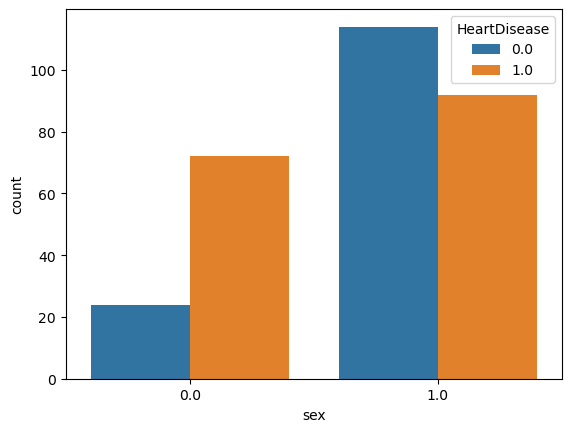

In [26]:
sns.countplot(data=df,x="sex",hue="HeartDisease")
plt.show()
    

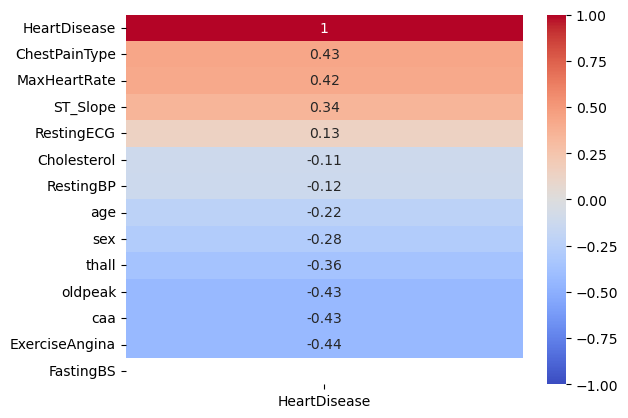

In [27]:
sns.heatmap(df.corr()[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False), vmin=-1, vmax=1,annot=True, cmap="coolwarm")
plt.show()

### Modelling

In [28]:
x=df[['ChestPainType','MaxHeartRate','ST_Slope']].values

In [29]:
y=df[['HeartDisease']].values

In [30]:
sc=StandardScaler()

In [31]:
x=sc.fit_transform(x)

In [32]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [33]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.7450537634408602
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.705268817204301
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.718494623655914
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.718494623655914
****************************************************************************************************


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.7261410788381742
Model accuracy on test is::  0.7868852459016393
confusion_matrix train is::  [[ 73  38]
 [ 28 102]]
confusion_matrix test is::  [[19  8]
 [ 5 29]]
Wrong Predictions made: 1815 / 3721
************************************************************


In [38]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [39]:
OUTPUT

,ACTUAL,PREDICTION
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
297,0,0
298,0,1
299,0,0
300,0,0


Model used is::  LogisticRegression()


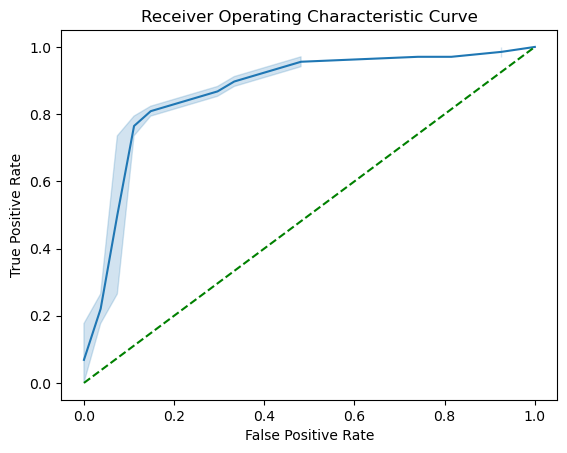

In [40]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()